<a href="https://colab.research.google.com/github/kabilan942/coursera-gp/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and DataSets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Visualization

In [4]:
survived_df = titanic_df[titanic_df['Survived']==1]

In [5]:
not_survived_df = titanic_df[titanic_df['Survived']==0]

In [6]:
print('Total number of passengers:',len(titanic_df))

print('Number of passengers who survived:',len(survived_df))
print('Percentage of people survived:',len(survived_df)*100/len(titanic_df),'%')

print('Number of passengers who did not survive:',len(not_survived_df))
print('Percentage of people not survived:',len(not_survived_df)*100/len(titanic_df),'%')

Total number of passengers: 891
Number of passengers who survived: 342
Percentage of people survived: 38.38383838383838 %
Number of passengers who did not survive: 549
Percentage of people not survived: 61.61616161616162 %


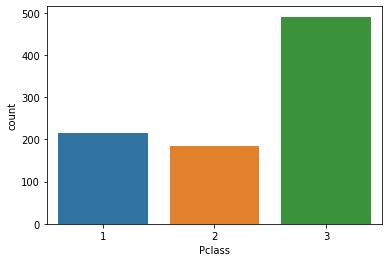

In [7]:
sns.countplot(x='Pclass', data=titanic_df)

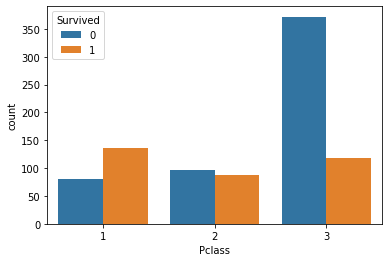

In [8]:
sns.countplot(x='Pclass', data=titanic_df, hue='Survived')

## Data Cleaning and Feature Engineering

In [9]:
titanic_df.head().isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

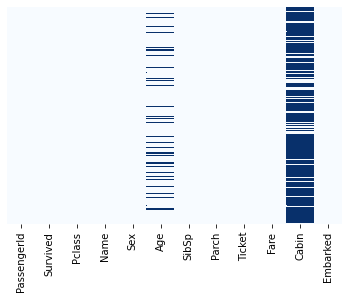

In [11]:
sns.heatmap(data=titanic_df.isnull(), cbar=False, yticklabels=False, cmap='Blues')

The 'Cabin' feature has a lot of missing values; so removing it is better than imputing it.

In [12]:
titanic_df.drop(labels='Cabin', axis=1, inplace=True)

In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
titanic_df.drop(labels=['Name','Ticket','PassengerId','Embarked'], axis=1, inplace=True)

In [15]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


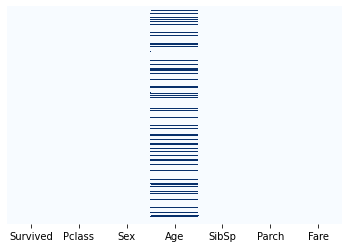

In [16]:
sns.heatmap(data=titanic_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

Age has missing values, but is an important feature.
FOr imputation, let's find the average of age, classified on the basis of sex.

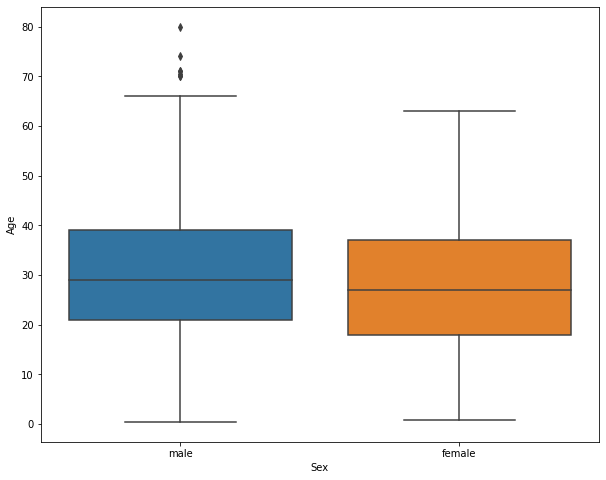

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Sex', y='Age', data=titanic_df)

In [18]:
male_df = titanic_df[titanic_df['Sex']=='male']
female_df = titanic_df[titanic_df['Sex']=='female']

print('Average age of male:', male_df['Age'].mean())
print('Average age of female:', female_df['Age'].mean())

print()

print('After rounding off age :')
print('-----------------------')
print('Average age of male:', male_df['Age'].mean().round())
print('Average age of female:', female_df['Age'].mean().round())

Average age of male: 30.72664459161148
Average age of female: 27.915708812260537

After rounding off age :
-----------------------
Average age of male: 31.0
Average age of female: 28.0


In [19]:
def Fill_age(data):
  age = data[0]
  sex = data[1]

  if pd.isnull(age):
    if sex is 'male':
      return 31
    else:
      return 28
  else:
    return age


In [20]:
titanic_df['Age'] = titanic_df[['Age','Sex']].apply(Fill_age, axis=1)

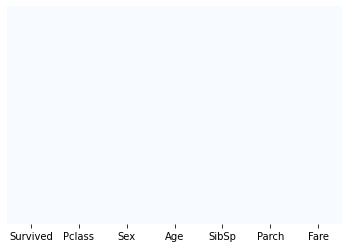

In [21]:
sns.heatmap(data = titanic_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [22]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

Notice that 'Age' feature has no more missing values

In [23]:
pd.get_dummies(titanic_df.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [24]:
male = pd.get_dummies(titanic_df['Sex'], drop_first=True)

Let's drop the 'Sex' column now and add the 'male' feature with the Data Frame.

In [25]:
titanic_df.drop(labels='Sex', axis=1, inplace=True)

In [26]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [27]:
titanic_df = pd.concat([titanic_df, male], axis=1)

In [28]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [29]:
X = titanic_df.drop('Survived', axis=1).values
y = titanic_df['Survived'].values

## Logistic Regression Classifier Model

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [32]:
from sklearn.linear_model import LogisticRegression

classif = LogisticRegression(random_state=7)
classif.fit(X_train, y_train)

LogisticRegression(random_state=7)

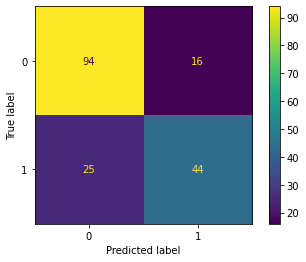

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = classif.predict(X_test)
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(cm)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.64      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



## Naive Bayes Classifier Model

In [40]:
from sklearn.naive_bayes import MultinomialNB

classif_nb = MultinomialNB()
classif_nb.fit(X_train, y_train)

MultinomialNB()

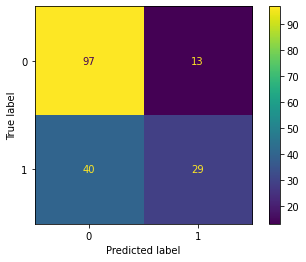

In [41]:
y_predict = classif_nb.predict(X_test)

cm_nb = ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
print(cm_nb)

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       110
           1       0.69      0.42      0.52        69

    accuracy                           0.70       179
   macro avg       0.70      0.65      0.65       179
weighted avg       0.70      0.70      0.68       179

